# Heart Disease Prediction

### Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import  matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

# Data Exploring

In [2]:
heart_df = pd.read_csv("heart-disease.csv")
heart_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
heart_df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
# find out the number of class exist

heart_df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

**In this project we have two different target class in the dataset**

<AxesSubplot:>

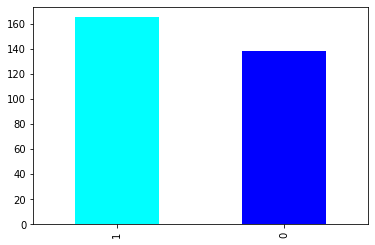

In [8]:
heart_df["target"].value_counts().plot(kind = "bar",color = ["cyan","blue"])

In [9]:
#lets check the missing values

heart_df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [11]:
# Heart disease frequency according to sex

heart_df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [12]:
#compare target column with sex column

pd.crosstab(heart_df.target, heart_df.sex)

sex,0,1
target,,
0,24,114
1,72,93


(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

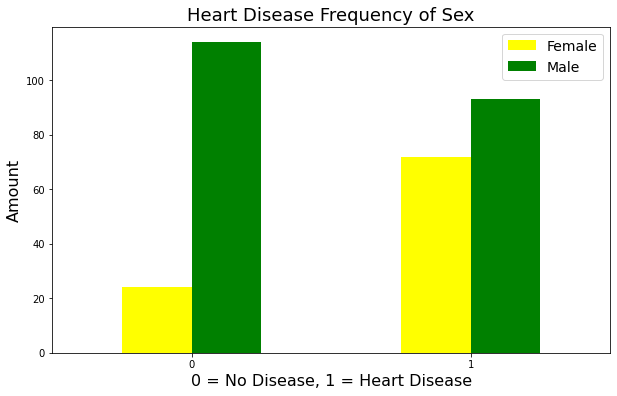

In [20]:
#plot the crosstab result

pd.crosstab(heart_df.target, heart_df.sex).plot(kind = "bar",
                                                figsize = (10,6),
                                                color = ["yellow", "green"])

plt.title("Heart Disease Frequency of Sex", fontsize = 18)
plt.xlabel("0 = No Disease, 1 = Heart Disease",fontsize = 16)
plt.ylabel("Amount", fontsize = 16)
plt.legend(["Female","Male"], fontsize = 14)
plt.xticks(rotation = 0)

**From the above plot we can say that Male are more prone to having Heart Disease then Female** 

# Age vs Max Heart Rate comparison

In [4]:
heart_df.thalach.value_counts()

162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: thalach, Length: 91, dtype: int64

In [5]:
heart_df.age[heart_df.target == 1]

0      63
1      37
2      41
3      56
4      57
       ..
160    56
161    55
162    41
163    38
164    38
Name: age, Length: 165, dtype: int64

In [6]:
heart_df.thalach[heart_df.target == 1]

0      150
1      187
2      172
3      178
4      163
      ... 
160    169
161    166
162    182
163    173
164    173
Name: thalach, Length: 165, dtype: int64

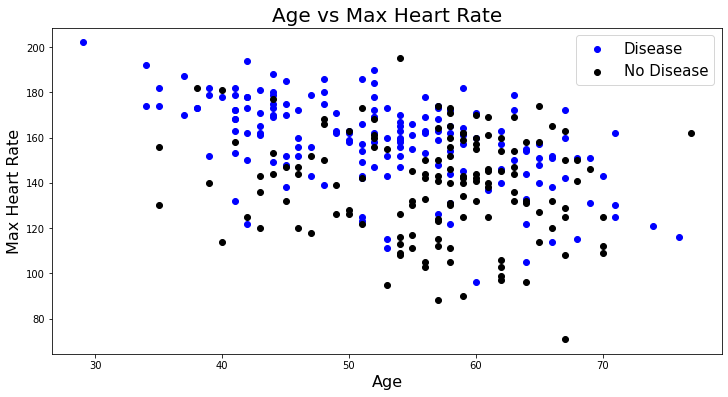

In [9]:
plt.figure(figsize = (12,6))

#scatter with positive examples
plt.scatter(heart_df.age[heart_df.target == 1],
            heart_df.thalach[heart_df.target == 1],
            color = "blue")

#scatter with negative examples
plt.scatter(heart_df.age[heart_df.target == 0],
            heart_df.thalach[heart_df.target == 0],
            color = "k")
plt.title("Age vs Max Heart Rate", fontsize = 20)
plt.xlabel("Age", fontsize = 16)
plt.ylabel("Max Heart Rate", fontsize = 16)
plt.legend(["Disease","No Disease"], fontsize = 15)

<AxesSubplot:ylabel='Frequency'>

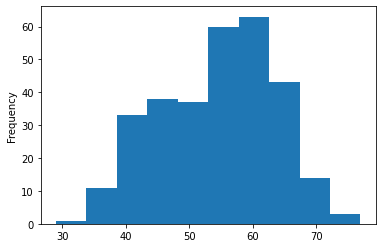

In [10]:
# Check the Age distribution of Heart Disease with a Histrogram

heart_df.age.plot.hist()

In [11]:
# Heart Disease Frequency per Chest pain

pd.crosstab(heart_df.cp, heart_df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


(array([0, 1, 2, 3]),
 [Text(0, 0, '0'), Text(1, 0, '1'), Text(2, 0, '2'), Text(3, 0, '3')])

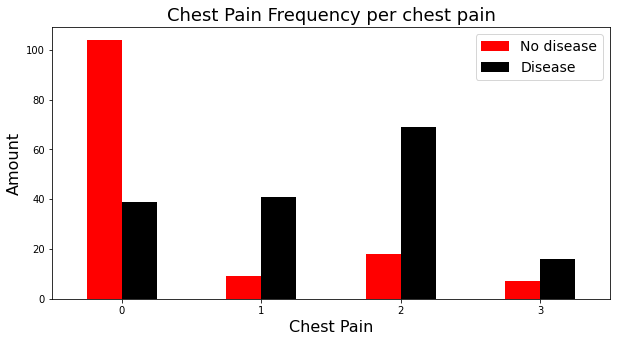

In [14]:
#visualize the result

pd.crosstab(heart_df.cp, heart_df.target).plot(kind = "bar",
                                               figsize = (10,5),
                                               color = ["red","k"])

plt.title("Chest Pain Frequency per chest pain", fontsize = 18)
plt.xlabel("Chest Pain", fontsize = 16)
plt.ylabel("Amount", fontsize = 16)
plt.legend(["No disease", "Disease"], fontsize = 14)
plt.xticks(rotation = 0)

In [15]:
#Check the correlation

heart_df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


<AxesSubplot:>

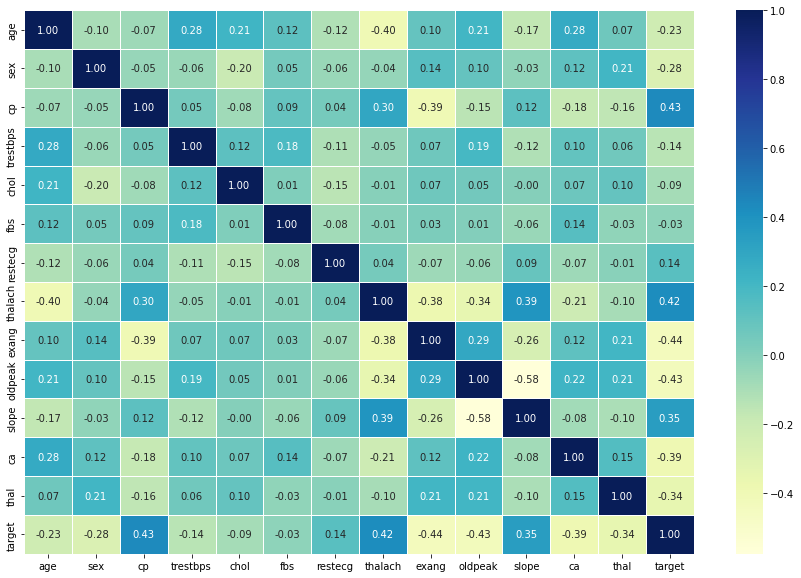

In [18]:
corr_mat = heart_df.corr()

plt.subplots(figsize = (15,10))
sns.heatmap(corr_mat,
            annot = True,
            linewidth = 0.5,
            fmt = ".2f",
            cmap = "YlGnBu")

# Modelling

In [3]:
#spliting the data

X = heart_df.drop(["target"],axis = 1)
y = heart_df["target"]

In [4]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

In [5]:
print("X_train shape :",X_train.shape)
print("X_test shape  :",X_test.shape)
print("Y_train shape :",y_train.shape)
print("Y_test shape  :",y_test.shape)

X_train shape : (212, 13)
X_test shape  : (91, 13)
Y_train shape : (212,)
Y_test shape  : (91,)


In [8]:
models = {"LogisticRegression":LogisticRegression(),
          "KNN":KNeighborsClassifier(),
          "Random Forest":RandomForestClassifier()}

#creating a function to fit models and scores

def fit_and_score(models, X_train,X_test,y_train,y_test):
    
    #random seed
    np.random.seed(21)
    
    model_score = {}
    
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test, y_test)
        
    return model_score

In [9]:
model_score = fit_and_score(models = models,
                            X_train = X_train,
                            X_test = X_test,
                            y_train = y_train,
                            y_test = y_test)

model_score

/home/robin/anaconda3/envs/robin/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


{'LogisticRegression': 0.8241758241758241,
 'KNN': 0.6593406593406593,
 'Random Forest': 0.8351648351648352}

# Hyperparameter Tuning

In [10]:
# Lets tune KNN

train_scores = []
test_scores = []

neighbors = range(1,21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    knn.fit(X_train, y_train)
    
    train_scores.append(knn.score(X_train, y_train))
    test_scores.append(knn.score(X_test,y_test))

In [11]:
#check Train score of KNN
train_scores

[1.0,
 0.7924528301886793,
 0.7735849056603774,
 0.7594339622641509,
 0.75,
 0.7405660377358491,
 0.7358490566037735,
 0.7311320754716981,
 0.7358490566037735,
 0.7169811320754716,
 0.7216981132075472,
 0.7311320754716981,
 0.7122641509433962,
 0.7075471698113207,
 0.7122641509433962,
 0.6981132075471698,
 0.6839622641509434,
 0.6509433962264151,
 0.6839622641509434,
 0.6698113207547169]

In [12]:
#test score

test_scores

[0.6263736263736264,
 0.5824175824175825,
 0.6703296703296703,
 0.6703296703296703,
 0.6593406593406593,
 0.6373626373626373,
 0.6813186813186813,
 0.7142857142857143,
 0.7142857142857143,
 0.7252747252747253,
 0.7032967032967034,
 0.6703296703296703,
 0.6593406593406593,
 0.6373626373626373,
 0.6483516483516484,
 0.6483516483516484,
 0.6703296703296703,
 0.6813186813186813,
 0.6703296703296703,
 0.6593406593406593]

Text(0.5, 1.0, 'Max KNN score on test data :72.53%')

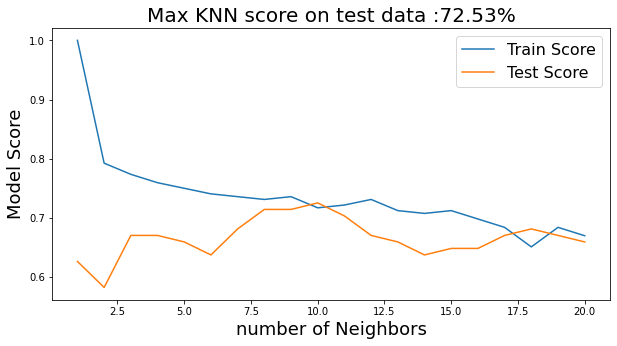

In [13]:
plt.figure(figsize = (10,5))
plt.plot(neighbors, train_scores,label = "Train Score")
plt.plot(neighbors, test_scores, label = "Test Score")
plt.xlabel("number of Neighbors",fontsize = 18)
plt.ylabel("Model Score",fontsize = 18)
plt.legend(fontsize = 16)
plt.title(f"Max KNN score on test data :{max(test_scores)*100:.2f}%", fontsize = 20)

# Hyperparameter Tuning with RandomizedSearchCV

In [14]:
#create a Hyperparameter grid for Logistic Regression

logreg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}

#create a Hyperparameter grid for Random Forest
rand_grid = {"n_estimators": np.arange(10,1000,50),
             "max_depth":[None,3,5,10],
             "min_samples_split":np.arange(2,20,2),
             "min_samples_leaf":np.arange(1,20,2)}

In [16]:
# Logistic Regression Tuning

np.random.seed(21)

log_reg_cv = RandomizedSearchCV(LogisticRegression(),
                                param_distributions = logreg_grid,
                                cv = 5,
                                n_iter = 20,
                                verbose = True)

log_reg_cv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [19]:
log_reg_cv.best_params_

{'solver': 'liblinear', 'C': 0.615848211066026}

In [20]:
log_reg_cv.score(X_test,y_test)

0.8241758241758241

In [21]:
# Random Forest CLassifer Tuning

rand_cv = RandomizedSearchCV(RandomForestClassifier(),
                             param_distributions = rand_grid,
                             cv = 5,
                             n_iter = 20,
                             verbose = True)

rand_cv.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [22]:
rand_cv.score(X_test,y_test)

0.8461538461538461

# Hyperparameter Tuning with GridSearchCV

In [8]:
#create a Hyperparameter grid for Logistic Regression

logreg_grid = {"C":np.logspace(-4,4,20),
               "solver":["liblinear"]}

logreg_gridCV = GridSearchCV(LogisticRegression(),
                             param_grid = logreg_grid,
                             cv = 5,
                             verbose = True)

logreg_gridCV.fit(X_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [9]:
logreg_gridCV.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [10]:
logreg_gridCV.score(X_test,y_test)

0.8241758241758241

# Evaluating Tunned Model beyond Accuracy

In [11]:
# Make prediction with tunned model

y_preds = logreg_gridCV.predict(X_test)

In [12]:
y_preds

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 0])

In [13]:
y_test[:10]

219    0
216    0
259    0
179    0
225    0
138    1
223    0
59     1
232    0
243    0
Name: target, dtype: int64

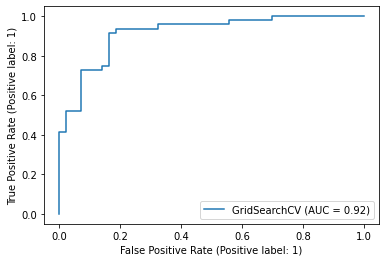

In [15]:
#Plotting ROC Curve

plot_roc_curve(logreg_gridCV, X_test, y_test)

In [16]:
#Confusion Matrix

print(confusion_matrix(y_test, y_preds))

[[36  7]
 [ 9 39]]


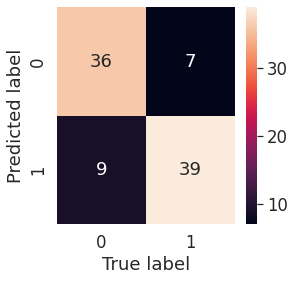

In [19]:
sns.set(font_scale = 1.5)

def conf_mat(y_test, y_preds):
    
    fig,ax = plt.subplots(figsize = (4,4))
    ax = sns.heatmap(confusion_matrix(y_test,y_preds),
                     annot = True,
                     cbar = True)
    
    plt.xlabel("True label")
    plt.ylabel("Predicted label")
    
conf_mat(y_test,y_preds)

In [21]:
#classification report 

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        43
           1       0.85      0.81      0.83        48

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.83      0.82      0.82        91



# calculate Evaluation matrics using cross validation

In [22]:
#check the best hyperparameter

logreg_gridCV.best_params_

{'C': 0.615848211066026, 'solver': 'liblinear'}

In [24]:
#create a classifier with best hyperparameter

clf = LogisticRegression(C = 0.615848,
                         solver = "liblinear")

In [26]:
#check the cross validate accuracy

cv_acc = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = "accuracy")

In [27]:
cv_acc

array([0.80327869, 0.85245902, 0.85245902, 0.85      , 0.75      ])

In [28]:
#check the cross validate precision

cv_prec = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = "precision")

cv_prec

array([0.76923077, 0.875     , 0.85294118, 0.83333333, 0.725     ])

In [29]:
#check the cross validate recall

cv_rec = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = "recall")
cv_rec

array([0.90909091, 0.84848485, 0.87878788, 0.90909091, 0.87878788])

In [31]:
#check the cross validate F1_score

cv_f1 = cross_val_score(clf,
                         X,
                         y,
                         cv = 5,
                         scoring = "f1")

cv_f1

array([0.83333333, 0.86153846, 0.86567164, 0.86956522, 0.79452055])

In [39]:
#create dataframe of cross validate results

cv_met = pd.DataFrame({"Accuracy":cv_acc,
                       "Precision":cv_prec,
                       "Recall":cv_rec,
                       "F1_Score":cv_f1})
                       
                       

In [40]:
cv_met

,Accuracy,Precision,Recall,F1_Score
0,0.803279,0.769231,0.909091,0.833333
1,0.852459,0.875000,0.848485,0.861538
2,0.852459,0.852941,0.878788,0.865672
3,0.850000,0.833333,0.909091,0.869565
4,0.750000,0.725000,0.878788,0.794521


<AxesSubplot:title={'center':'Cross Validate Classification Metrics'}>

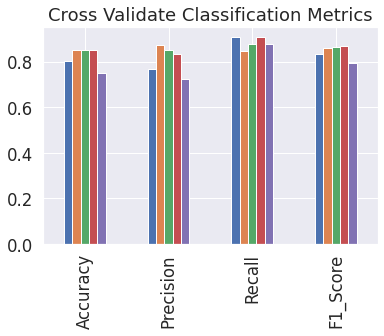

In [41]:
cv_met.T.plot.bar(title = "Cross Validate Classification Metrics",
                  legend = False)

# Feature Importance

In [43]:
clf = LogisticRegression(C = 0.615848,
                         solver = "liblinear")

In [44]:
clf.fit(X_train,y_train)

LogisticRegression(C=0.615848, solver='liblinear')

In [46]:
#check coef
clf.coef_

array([[-2.17049778e-05, -1.25083398e+00,  7.76951332e-01,
        -1.64567248e-02, -4.03276979e-03, -7.06416172e-02,
         3.83371628e-01,  3.84341487e-02, -7.80350962e-01,
        -4.32973451e-01,  3.74242035e-01, -5.90148679e-01,
        -9.76922340e-01]])

In [47]:
# Match coeff of features to columns

feature_dict = dict(zip(heart_df.columns, list(clf.coef_[0])))
feature_dict

{'age': -2.170497777638901e-05,
 'sex': -1.2508339838575644,
 'cp': 0.7769513315873166,
 'trestbps': -0.016456724785587448,
 'chol': -0.004032769790772466,
 'fbs': -0.07064161716450211,
 'restecg': 0.3833716281371322,
 'thalach': 0.03843414868637375,
 'exang': -0.7803509619234719,
 'oldpeak': -0.43297345100583534,
 'slope': 0.3742420345994136,
 'ca': -0.5901486794410687,
 'thal': -0.9769223395427299}

<AxesSubplot:title={'center':'Feature importance'}>

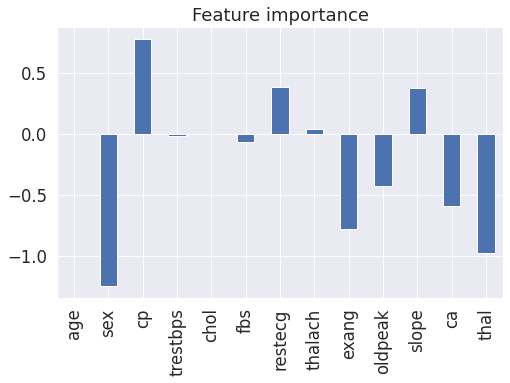

In [49]:
#Visualize feature importance

feature_df = pd.DataFrame(feature_dict,index = [0])
feature_df.T.plot.bar(title = "Feature importance",
                      legend = False,
                      figsize = (8,5))

# Try XGBoost classifier

In [9]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import warnings
warnings.filterwarnings("ignore")

In [10]:
#build model

xgb_model = XGBClassifier()

#fit the data
xgb_model.fit(X_train,y_train)

[00:33:04] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [11]:
xgb_model.score(X_test,y_test)

0.8021978021978022

In [12]:
y_pred = xgb_model.predict(X_test)

<AxesSubplot:>

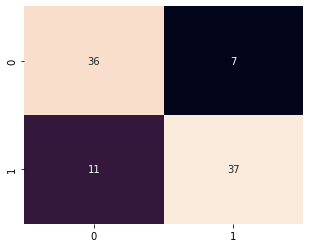

In [15]:
# Evaluate XGB model
plt.figure(figsize = (5,4))
sns.heatmap(confusion_matrix(y_test,y_pred),
            annot = True,
            cbar = False,
            )

In [16]:
# make predictions for test data
# use predict_proba since we need probabilities to compute auc

y_pred_prob = xgb_model.predict_proba(X_test)

y_pred_prob[:10]

array([[9.9659812e-01, 3.4018687e-03],
       [5.3014284e-01, 4.6985716e-01],
       [2.5603718e-01, 7.4396282e-01],
       [9.9806857e-01, 1.9314555e-03],
       [9.9849498e-01, 1.5049917e-03],
       [7.5762659e-01, 2.4237342e-01],
       [9.9803394e-01, 1.9660522e-03],
       [9.9057639e-01, 9.4236312e-03],
       [9.9843609e-01, 1.5638839e-03],
       [9.9924642e-01, 7.5356680e-04]], dtype=float32)

In [17]:
from sklearn.metrics import roc_auc_score, roc_curve

In [18]:
y_pred_prob[:,1]

array([3.4018687e-03, 4.6985716e-01, 7.4396282e-01, 1.9314555e-03,
       1.5049917e-03, 2.4237342e-01, 1.9660522e-03, 9.4236312e-03,
       1.5638839e-03, 7.5356680e-04, 9.5835894e-01, 9.2128778e-01,
       1.1043959e-02, 2.9747856e-01, 9.9708730e-01, 3.8648404e-02,
       8.6879116e-01, 8.1538641e-01, 7.4715060e-01, 1.4055555e-04,
       9.9233669e-01, 1.4847689e-04, 9.9865627e-01, 4.3322116e-01,
       8.4735090e-01, 1.0437508e-03, 2.0597999e-03, 1.2574130e-04,
       9.0113026e-01, 9.9426842e-01, 9.9984097e-01, 1.5145216e-02,
       1.2008135e-03, 7.1991775e-03, 1.4570409e-03, 9.9401516e-01,
       9.5750815e-01, 9.8651832e-01, 2.3854268e-01, 1.5017363e-01,
       4.8272961e-01, 9.9966168e-01, 5.1518145e-04, 6.5833633e-03,
       9.8092228e-01, 5.5002552e-01, 3.7548906e-04, 2.3486929e-02,
       3.0825967e-02, 9.9557072e-01, 7.1693189e-02, 9.9560875e-01,
       1.4683547e-03, 6.1385939e-04, 9.9966812e-01, 9.8454595e-01,
       9.9517882e-01, 7.5295579e-01, 6.5151238e-01, 9.7117639e

In [19]:
roc_auc_score(y_test, y_pred_prob[:,1])

0.9021317829457365

In [20]:
fpr,tpr,threshold = roc_curve(y_test,y_pred_prob[:,1])

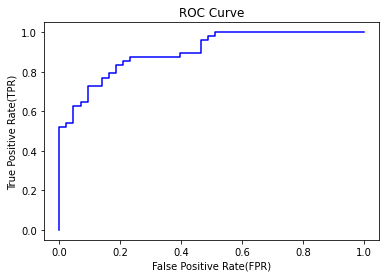

In [21]:
plt.plot(fpr,tpr,color = "blue",label = "ROC")
plt.xlabel("False Positive Rate(FPR)")
plt.ylabel("True Positive Rate(TPR)")
plt.title("ROC Curve")
plt.show()

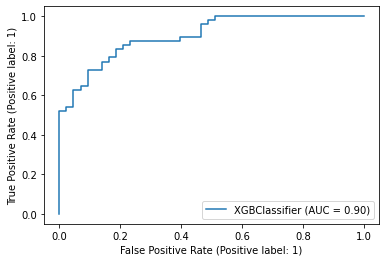

In [23]:
#using plot_roc_curve

plot_roc_curve(xgb_model, X_test,y_test)

# Hyperparameter Tuning

In [41]:
param_grid = {"learning_rate":[0.1,0.01,0.2],
              "subsample":[0.3,0.6,0.9],
              "gamma":[0,1]}

xgb_t_model = XGBClassifier(eval_metric = "logloss")

#cv model

xgb_cv = GridSearchCV(xgb_t_model,
                     param_grid = param_grid,
                     cv = 5,
                     verbose = True)

In [42]:
#fit the model

xgb_cv.fit(X_train, y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False,
                                     eval_metric='logloss', gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
          

In [43]:
xgb_cv.best_params_

{'gamma': 0, 'learning_rate': 0.1, 'subsample': 0.3}

In [44]:
xgb_cv.score(X_test, y_test)

0.8241758241758241

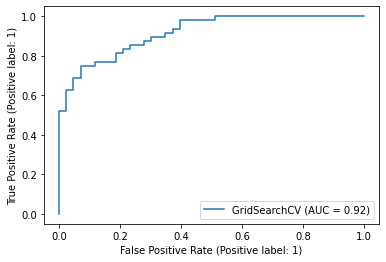

In [45]:
plot_roc_curve(xgb_cv, X_test, y_test)

In [46]:
y_preds = xgb_cv.predict(X_test)

<AxesSubplot:>

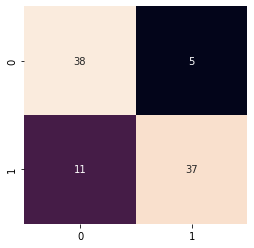

In [47]:
#confusion matrix

plt.figure(figsize = (4,4))
sns.heatmap(confusion_matrix(y_test, y_preds),
            annot = True,
            cbar = False)

In [48]:
# Cv results

cv_res = pd.DataFrame(xgb_cv.cv_results_)
cv_res

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_gamma,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.349202,0.095872,0.005573,0.000269,0,0.1,0.3,"{'gamma': 0, 'learning_rate': 0.1, 'subsample'...",0.720930,0.883721,0.880952,0.809524,0.857143,0.830454,0.060882,1
1,0.333960,0.012910,0.006184,0.000780,0,0.1,0.6,"{'gamma': 0, 'learning_rate': 0.1, 'subsample'...",0.697674,0.837209,0.833333,0.738095,0.833333,0.787929,0.058619,16
2,0.323203,0.021831,0.006127,0.001275,0,0.1,0.9,"{'gamma': 0, 'learning_rate': 0.1, 'subsample'...",0.674419,0.813953,0.857143,0.761905,0.809524,0.783389,0.062278,18
3,0.304191,0.005560,0.006064,0.000899,0,0.01,0.3,"{'gamma': 0, 'learning_rate': 0.01, 'subsample...",0.627907,0.860465,0.833333,0.809524,0.857143,0.797674,0.086847,8
4,0.311501,0.005207,0.005492,0.000231,0,0.01,0.6,"{'gamma': 0, 'learning_rate': 0.01, 'subsample...",0.627907,0.883721,0.857143,0.785714,0.857143,0.802326,0.093094,5
5,0.339618,0.035521,0.006142,0.000944,0,0.01,0.9,"{'gamma': 0, 'learning_rate': 0.01, 'subsample...",0.627907,0.837209,0.880952,0.785714,0.857143,0.797785,0.090552,7
6,0.319112,0.022190,0.005714,0.000635,0,0.2,0.3,"{'gamma': 0, 'learning_rate': 0.2, 'subsample'...",0.697674,0.837209,0.880952,0.857143,0.809524,0.816501,0.063880,2
7,0.311508,0.009049,0.005450,0.000059,0,0.2,0.6,"{'gamma': 0, 'learning_rate': 0.2, 'subsample'...",0.720930,0.837209,0.809524,0.785714,0.785714,0.787818,0.038454,17
8,0.318087,0.021036,0.005464,0.000165,0,0.2,0.9,"{'gamma': 0, 'learning_rate': 0.2, 'subsample'...",0.674419,0.813953,0.880952,0.761905,0.857143,0.797674,0.073767,9
9,0.301470,0.001651,0.005516,0.000145,1,0.1,0.3,"{'gamma': 1, 'learning_rate': 0.1, 'subsample'...",0.697674,0.860465,0.833333,0.833333,0.857143,0.816390,0.060450,3


In [52]:
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        43
           1       0.88      0.77      0.82        48

    accuracy                           0.82        91
   macro avg       0.83      0.83      0.82        91
weighted avg       0.83      0.82      0.82        91

